In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<AxesSubplot:>

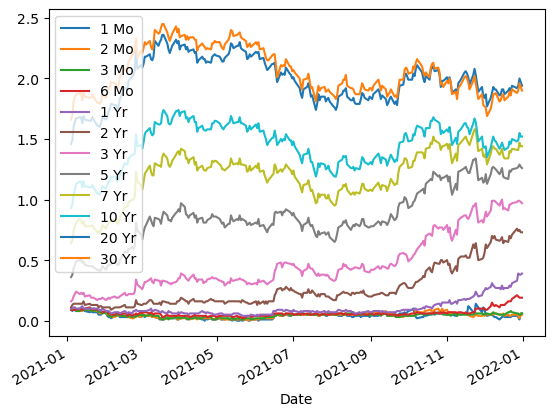

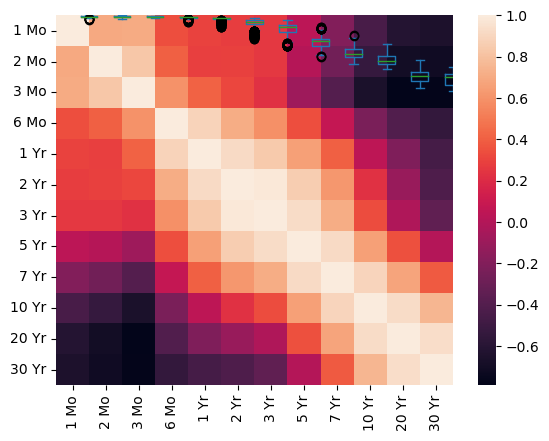

In [15]:
years = [2021]
filenames=[f'treasury_yield/daily-treasury-rates-{year}.csv' for year in years]
yield_data = pd.concat([pd.read_csv(filename) for filename in filenames])
yield_data.drop(['4 Mo'], inplace=True, axis=1, errors='ignore')
yield_data.Date = pd.to_datetime(yield_data.Date)
yield_data.set_index('Date', inplace=True)
yield_data.sort_index(inplace=True)
yield_data.plot()
yield_data.plot.box()
yield_data_changes = yield_data.diff().dropna(axis=0)
sn.heatmap(yield_data.corr())

In [16]:
yield_data_changes = yield_data_changes.apply(lambda x: (x-x.mean()), axis=0)
yield_data = yield_data.apply(lambda x: (x-x.mean()), axis=0)

In [17]:
pca = PCA(n_components=4)
pca.fit(yield_data)
print(pca.explained_variance_ratio_)

[0.61664327 0.36533125 0.01231398 0.00198471]


In [18]:
eigen_values = [np.sqrt(np.dot(component.T, np.dot(yield_data.cov(), component)))for component in pca.components_]

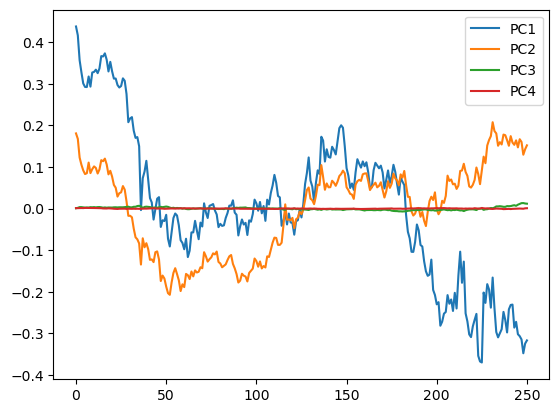

In [19]:
[plt.plot(np.dot(yield_data, component)*eigen_values[i]) for i, component in enumerate(pca.components_)]
plt.legend(['PC1', 'PC2', 'PC3', 'PC4'])